In [2]:
from fastai2.vision.all import *
set_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
import warnings
warnings.filterwarnings("ignore")

In [3]:
path = Path('../../rf-chess-data/cropped_v1/')
fns = get_image_files(path)  # works recursively, to each subfolder

# failed = verify_images(fns)

In [4]:
fns[:3]

(#3) [Path('../../rf-chess-data/cropped_v1/00000_white-pawn.jpg'),Path('../../rf-chess-data/cropped_v1/00001_black-queen.jpg'),Path('../../rf-chess-data/cropped_v1/00002_black-pawn.jpg')]

In [5]:
def piece_class_parse(fn): 
    fn = fn.split('_')[1]
    fn = fn.split('.')[0]
    return fn

In [6]:
pieces = ImageDataLoaders.from_name_func(
                path, 
                get_image_files(path),
                valid_pct=0.2, 
                seed=42,
                label_func=piece_class_parse, 
#                 item_tfms=Resize(128),
                item_tfms=RandomResizedCrop(128, min_scale=0.5),
                batch_tfms=aug_transforms(),
                )

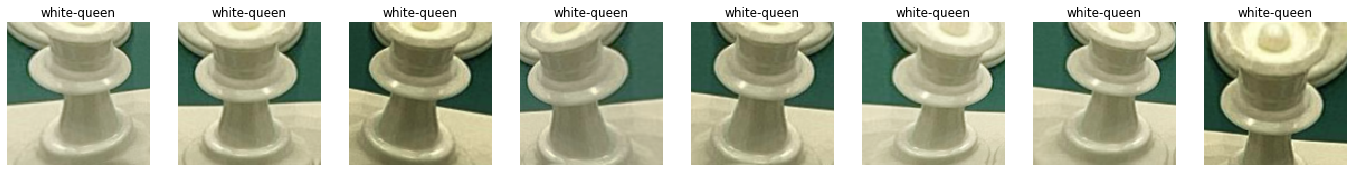

In [9]:
pieces.train.show_batch(max_n=8, nrows=1, unique=True)

2

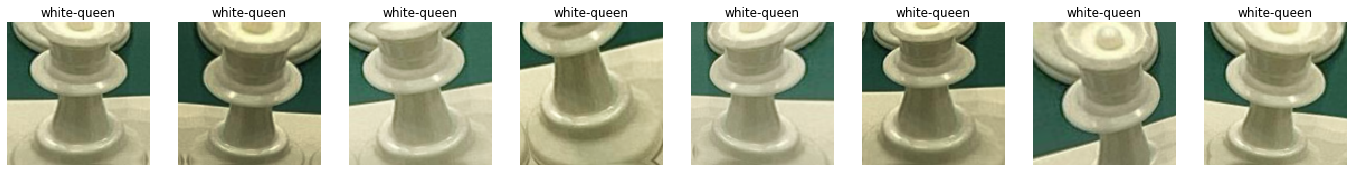

In [13]:
pieces.train.show_batch(max_n=8, nrows=1, unique=True)
1+1

In [12]:
type(pieces)

fastai2.data.core.DataLoaders

In [11]:
type(pieces.train)

fastai2.data.core.TfmdDL

In [2]:
from fastai2.vision.all import *
set_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
import warnings
warnings.filterwarnings("ignore")

path = Path('../../rf-chess-data/cropped_v1/')
fns = get_image_files(path)  # works recursively, to each subfolder

# failed = verify_images(fns)

fns[:3]

def piece_class_parse(fn): 
    fn = fn.split('_')[1]
    fn = fn.split('.')[0]
    return fn

pieces = ImageDataLoaders.from_name_func(
                path, 
                get_image_files(path),
                valid_pct=0.2, 
                seed=42,
                label_func=piece_class_parse, 
#                 item_tfms=Resize(128),
                item_tfms=RandomResizedCrop(128, min_scale=0.5),
                batch_tfms=aug_transforms(),
                )

pieces.train.show_batch(max_n=8, nrows=1, unique=True)

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)


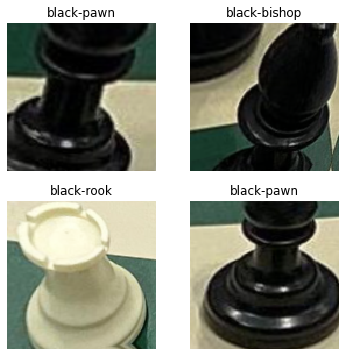

In [7]:
pieces.show_batch(max_n=4)

In [67]:
learn = cnn_learner(pieces, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.592344,0.225219,0.055749,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.331183,0.108400,0.020906,00:05
1,0.232982,0.092184,0.013937,00:05
2,0.173403,0.084749,0.010453,00:05
3,0.145364,0.082581,0.010453,00:05


In [53]:
!pwd

/home/jupyter/my-fastai2-dev/chess-classification-hw


In [58]:
import os

In [68]:
learn.path = Path('/home/jupyter/my-fastai2-dev/chess-classification-hw/')

In [71]:
learn.export(Path('models/standard-piece-2.pkl'))

In [70]:
!ls models

chess1.pkl


In [25]:
!ls -1

bing_search_img.ipynb
class_execercise_1.ipynb
class_execercise_2.ipynb
crop_script_v1.py
data_transform1.ipynb
eda_2.ipynb
meta-data
models
modules
readme.md
Untitled.ipynb


In [36]:
learn.predict('../../rf-chess-data/cropped_v1/00001_black-queen.jpg')

('black-queen',
 tensor(4),
 tensor([9.4498e-06, 6.8743e-04, 6.6458e-08, 2.4124e-07, 9.9929e-01, 1.6199e-06, 9.4365e-07, 6.8985e-06, 2.7374e-08, 5.3158e-10, 6.3544e-06, 2.7342e-07]))

In [27]:
!ls models

chess1.pkl


In [50]:
!ls ../../rf-chess-data/cropped_v1/*.pkl

../../rf-chess-data/cropped_v1/export.pkl
../../rf-chess-data/cropped_v1/standard-piece-2.pkl


In [41]:
learn.path

Path('../../rf-chess-data/cropped_v1')

In [37]:
learn.export('aaa')

In [38]:
!ls

bing_search_img.ipynb	  crop_script_v1.py	 meta-data  readme.md
class_execercise_1.ipynb  data_transform1.ipynb  models     Untitled.ipynb
class_execercise_2.ipynb  eda_2.ipynb		 modules


In [40]:
!ls modules

bingutils.py  misc.py  plotutils.py  __pycache__


In [19]:
# first time
# learn = cnn_learner(pieces, resnet18, metrics=error_rate)
# learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.692937,0.184626,0.047038,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.361239,0.126910,0.031359,00:05
1,0.250677,0.096145,0.019164,00:05
2,0.183771,0.083168,0.010453,00:05
3,0.141690,0.089129,0.012195,00:05


##### Evaluation

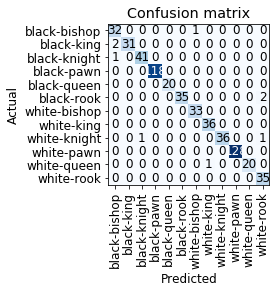

In [9]:
# second time
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

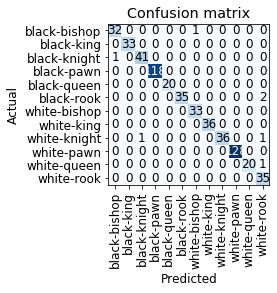

In [20]:
# first time
# interp = ClassificationInterpretation.from_learner(learn)
# interp.plot_confusion_matrix()

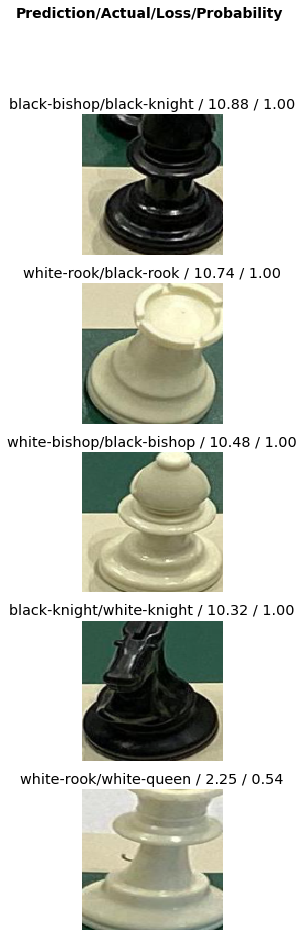

In [21]:
interp.plot_top_losses(5, nrows=5)

In [22]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
cleaner.